In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bfs = pd.read_csv('https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv')
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
#Preliminary Analysis on the given data

In [6]:
bfs.shape

(537577, 12)

In [7]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
bfs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 183.6 MB


In [9]:
bfs.Purchase.min()

185

In [10]:
bfs.Purchase.max()

23961

In [11]:
max_purchase_info = bfs[bfs.Purchase == bfs.Purchase.max()]
max_purchase_info.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,NaN,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,NaN,23961
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,NaN,23961


In [12]:
max_purchase_info['Gender'].value_counts()

M    3
Name: Gender, dtype: int64

In [13]:
x = bfs[bfs.Purchase == bfs.Purchase.min()]
x.shape
x.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27602,1004227,P00171342,M,26-35,19,A,0,0,13,16.0,NaN,185
377309,1004048,P00041442,F,36-45,1,B,1,0,13,14.0,16.0,185
403039,1001968,P00102142,M,26-35,11,B,2,0,13,16.0,NaN,185
411541,1003391,P00041442,M,18-25,4,A,0,0,13,14.0,16.0,185


**Observation**

From theabove cells we look int omax purchase information and minimum purchase information
For the maximum purchase information we keep in mind the gender of the person,age and the martial status of the person
Similarly for the minmum purchase we keep track of the gender and the martial status

But as the number of datapoints in max and min purchase is very small(3 and 4 repectively) we cannot generalise 
based on them

<AxesSubplot:>

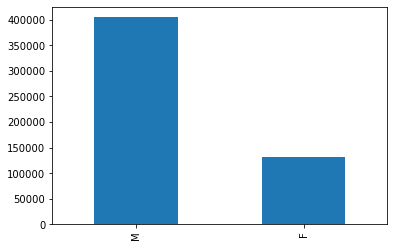

In [14]:
bfs.Gender.value_counts().plot(kind='bar')

In [15]:
bfs.Gender.value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

**Observation**

This implies many of the black friday shoppers were males 

In [16]:
bfs.Marital_Status.value_counts(normalize=True)*100

0    59.120275
1    40.879725
Name: Marital_Status, dtype: float64

In [17]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [31]:
number_of_times_shopped = bfs.sort_values('User_ID',ascending=True,kind='quicksort').groupby('User_ID')['User_ID'].count().values

In [51]:
for i in range(1,101):
    print(i,'percentile is ',np.round(np.percentile(number_of_times_shopped,i),5))

1 percentile is  9.0
2 percentile is  10.0
3 percentile is  11.0
4 percentile is  12.0
5 percentile is  13.0
6 percentile is  13.0
7 percentile is  14.0
8 percentile is  14.0
9 percentile is  15.0
10 percentile is  15.0
11 percentile is  16.0
12 percentile is  16.0
13 percentile is  17.0
14 percentile is  17.0
15 percentile is  18.0
16 percentile is  18.0
17 percentile is  19.0
18 percentile is  19.0
19 percentile is  20.0
20 percentile is  21.0
21 percentile is  21.0
22 percentile is  22.0
23 percentile is  23.0
24 percentile is  24.0
25 percentile is  25.0
26 percentile is  25.0
27 percentile is  26.0
28 percentile is  27.0
29 percentile is  28.0
30 percentile is  28.0
31 percentile is  29.0
32 percentile is  30.0
33 percentile is  31.0
34 percentile is  32.0
35 percentile is  33.0
36 percentile is  34.0
37 percentile is  35.0
38 percentile is  36.0
39 percentile is  37.0
40 percentile is  39.0
41 percentile is  40.0
42 percentile is  41.0
43 percentile is  42.0
44 percentile is  43.

In [52]:
for i in range(90,101):
    print(i,'th percentile is ',np.round(np.percentile(number_of_times_shopped,i),5))

90 th percentile is  222.0
91 th percentile is  234.0
92 th percentile is  249.0
93 th percentile is  269.0
94 th percentile is  285.6
95 th percentile is  306.5
96 th percentile is  341.0
97 th percentile is  381.3
98 th percentile is  435.0
99 th percentile is  497.0
100 th percentile is  1025.0


In [53]:
for i in np.arange(99,101,0.1):
    i = np.round(i,1)
    print(i,'th percentile is ',np.round(np.percentile(number_of_times_shopped,i),5))
    if i == int(100):
        break

99.0 th percentile is  497.0
99.1 th percentile is  516.84
99.2 th percentile is  532.52
99.3 th percentile is  547.77
99.4 th percentile is  558.66
99.5 th percentile is  574.55
99.6 th percentile is  625.96
99.7 th percentile is  679.33
99.8 th percentile is  698.76
99.9 th percentile is  753.54
100.0 th percentile is  1025.0


In [28]:
bfs.sort_values('User_ID',ascending=True,kind='quicksort').groupby('User_ID')['User_ID'].count().mean()

91.25394669835342

**Observation**

From the above we can say that the averge number of times shopped during black friday is 91.25.


From the percentile computation we can find that 99% of the users have shopped during black friday less than or equal to 
497 times

<AxesSubplot:>

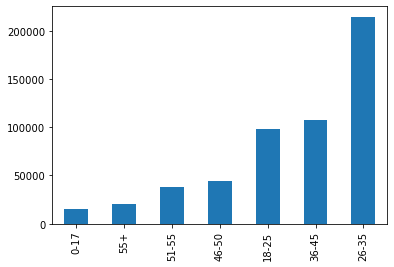

In [69]:
bfs.Age.value_counts().sort_values().plot(kind='bar')

**Observation**

From the above we can say that majority of shoppers are in the age group 26 to 35.

In [67]:
bfs.groupby('Age').Purchase.mean().sort_values(ascending=False)

Age
51-55    9620.616620
55+      9453.898579
36-45    9401.478758
26-35    9314.588970
46-50    9284.872277
18-25    9235.197575
0-17     9020.126878
Name: Purchase, dtype: float64

**Observation**

Though shoppers with age group 51 - 55 are small when compared to shoppers with age group 26-35
we can however see that the average purchase made by people in the age group 51-55 is 9620.616620 which is slightly higher 
than the average purchase of people from age group 26-35 which is 9314.5



In [43]:

np.arange(1,3,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [70]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:ylabel='Marital_Status'>

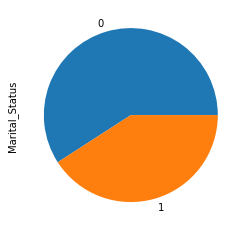

In [95]:
bfs.Marital_Status.value_counts().plot(kind='pie')


<AxesSubplot:ylabel='Purchase'>

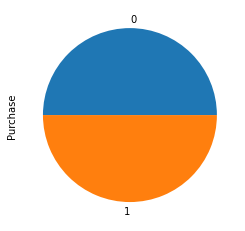

In [96]:
bfs.groupby('Marital_Status').Purchase.mean().plot(kind='pie')

**Observation**
From the above we can say that there is not much difference in the Purchase made by people who are married and those 
who are single


<AxesSubplot:xlabel='City_Category'>

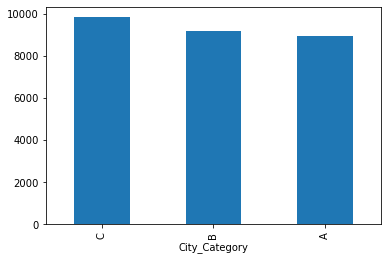

In [89]:
bfs.groupby('City_Category')['Purchase'].mean().sort_values(ascending=False).plot(kind='bar')

**Observation**

From the above plot we see that the average purchase of people in city C is slighlty higher than the average purchase of people in City B and City A

In [77]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [91]:
bfs.Product_Category_1.value_counts().sort_values()

9        404
17       567
14      1500
18      3075
7       3668
12      3875
10      5032
13      5440
15      6203
16      9697
4      11567
3      19849
6      20164
2      23499
11     23960
8     112132
1     138353
5     148592
Name: Product_Category_1, dtype: int64

In [93]:
bfs.Product_Category_2.value_counts(dropna=False).sort_values(ascending=False)

NaN     166986
8.0      63058
14.0     54158
2.0      48481
16.0     42602
15.0     37317
5.0      25874
4.0      25225
6.0      16251
11.0     13945
17.0     13130
13.0     10369
9.0       5591
12.0      5419
10.0      2991
3.0       2835
18.0      2730
7.0        615
Name: Product_Category_2, dtype: int64

In [94]:
bfs.Product_Category_3.value_counts(dropna=False).sort_values(ascending=False)

NaN     373299
16.0     32148
15.0     27611
14.0     18121
17.0     16449
5.0      16380
8.0      12384
9.0      11414
12.0      9094
13.0      5385
6.0       4818
18.0      4563
4.0       1840
11.0      1773
10.0      1698
3.0        600
Name: Product_Category_3, dtype: int64

<AxesSubplot:ylabel='Purchase'>

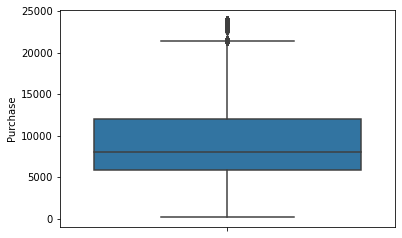

In [99]:
sns.boxplot(y='Purchase',data=bfs)